# MODULENDPRÜFUNG STATISTICS FOR DATA SCIENCE HS18

## Aufgabe 1: Elektrische Widerstände (22 Punkte)

Zwei verschiedene Messmethoden für elektrische Widerstände sollen miteinander verglichen
werden. Aus diesem Grund wurden an 30 Widerständen Parallelmessungen vorgenommen,
die in der Datei `widerstaende.txt` im Verzeichnis `Austausch` enthalten sind. In der ersten Spalte befinden sich die Messwerte nach der Methode *A*, in der zweiten Spalte befinden
sich die Messwerte nach der Methode *B* - die Einheit ist Ohm. Wir möchten überprüfen, ob
die beiden Methoden gleichwertig sind.

---
a) (2 Punkte) Handelt es sich um einen gepaarten oder einen ungepaarten Test?

Es handelt sich um gepaarte Stichproben, da es sich bei den beiden Messwerten um den gleichen Widerstand handelt.

---
b) (3 Punkte) Geben Sie die Null- und die Alternativhypothese an.

$$H_0: \mu_A = \mu_B$$

$$H_A: \mu_A \neq \mu_B$$

Wir behaupten die beiden Messmethoden geben statistisch signifikant Identische Messergebnise.

---
c) (4 Punkte) Geben Sie eine Schätzung für den Mittelwert $\mu$ und die Varianz $σ^2$ der Differenzen an.

In [2]:
import pandas as pd
import numpy as np

resistors = pd.read_csv('widerstaende.txt', sep=' ')

In [3]:
resistors.head()

,Methode A,Methode B
0,98.574391,99.794713
1,101.207987,99.032684
2,98.017907,99.696307
3,99.360374,100.840861
4,100.301177,100.174309


In [4]:
resistor_diff = resistors["Methode A"] - resistors["Methode B"]

In [5]:
resistor_diff.head()

0   -1.220322
1    2.175303
2   -1.678400
3   -1.480487
4    0.126868
dtype: float64

In [30]:
mean, var = resistor_diff.mean(), resistor_diff.var()
mean, var

(-0.9502568696222127, 1.8898564410608352)

In [25]:
resistor_diff.describe()

count    30.000000
mean     -0.950257
std       1.374720
min      -3.703859
25%      -1.468907
50%      -0.996938
75%      -0.334442
max       2.220090
dtype: float64

---
d) (9 Punkte) Führen Sie den geeigneten t-Test durch: Geben Sie die Teststatistik und deren
Verteilung unter der Nullhypothese an, bestimmen Sie den (realisierten) Wert der Teststatistik $T$, den Verwerfungsbereich für $T$ und den Testentscheid. Überprüfen Sie, ob ein
t-Test angebracht ist. Welche weiteren statistischen Tests kämen in Frage, falls die Bedingungen für die Anwendung eines t−Tests nicht erfüllt sind? (Wenn Sie obige Aufgabe
nicht lösen konnten, benutzen Sie im folgenden als Ersatzwert $σ^2 = 2.5$.)

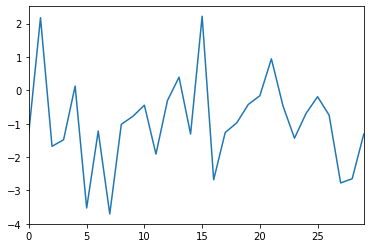

In [26]:
resistor_diff.plot()

Fuer den folgenden t-Test wird das Signifikanzniveau $\alpha = 0.05$ verwendet.

In [31]:
import scipy.stats as st

n = resistor_diff.size

st.t.interval(0.95, loc=mean, scale=var/np.sqrt(n), df=(n - 1))

(-1.655940862306151, -0.24457287693827445)

Das Vertrauensintervall ist $[-1.46, -0.44]$ somit ist der zweiseitige Verwerfungsbereich $(-\infty, -1.46]$ und $[-0.44, \infty)$

In [32]:
st.ttest_rel(resistors["Methode A"], resistors["Methode B"])

Ttest_relResult(statistic=-3.7860577810321954, pvalue=0.0007128629380377862)

Da der p-Wert mit 0.00071 weit unter dem Signifikanzniveau ist, wird die Nullhypothese deutlich verworfen. Das Heisst die beiden Messmethoden ergeben, Statistisch signifikant nicht das gleiche

Um einen Aussagekraeftigen t-Test durchfuehren zu koennen, muss eine Normalverteilung angenommen werden. Da wir hier nicht von einer Normalverteilung ausgehen koennen, waehre ein Wolcoxon- oder Vorzeichentest angebracht. Jedoch kommt auch dieser zum gleichen Testresultat.

In [33]:
st.wilcoxon(resistors["Methode A"], resistors["Methode B"], correction=True)

WilcoxonResult(statistic=67.0, pvalue=0.0006893605573928746)

Die Teststatistik:

$$T(X) = \frac{\bar{X} - \mu}{\hat{\sigma}/\sqrt{n}}$$

---
e) (4 Punkte) Bestimmen Sie ein zweiseitiges 95%-Vertrauensintervall für $µ_D$, erklären Sie die
Bedeutung dieses Intervalls, und fällen Sie den Testentscheid aus Teilaufgabe (d) mit Hilfe
des von Ihnen ermittelten Vertrauensintervalls.

In [34]:
st.t.interval(0.95, loc=mean, scale=var/np.sqrt(n), df=(n - 1))

(-1.655940862306151, -0.24457287693827445)

## Aufgabe 2: Stochastischer Prozess (17 Punkte)

Betrachten Sie den stochastischen Prozess, der gegeben ist durch

$$X(t) = A \cdot cos(\pi t)$$

wobei $A$ eine Exponential-verteilte Zufallsvariable ist, also $A ∼ \text{Exp}(λ)$.

---
(a) (4 Punkte) Zum Zeitpunkt $t_0 = \frac{1}{3}$ wurde über sehr viele Realisierungen von X(t) der
empirische Scharmittelwert $\bar{x}(t = t_0) = 0.1$ ermittelt. Schätzen Sie $λ$.

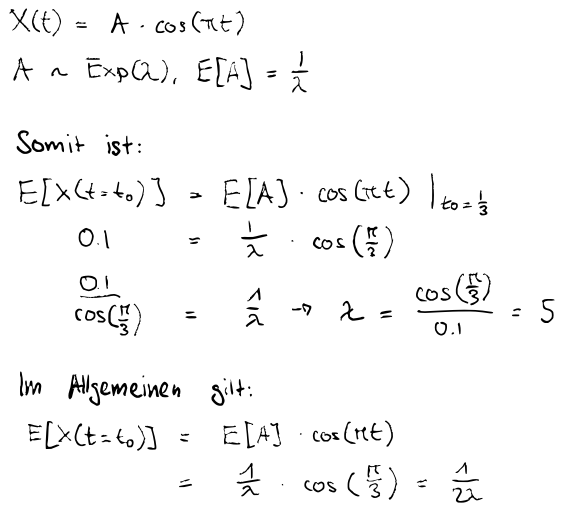

---
(b) (4 Punkte) Wie gross ist die Wahrscheinlichkeit $P[X(t = t_0) > 0.5]$? Benützen Sie dazu
die Schätzung $b_λ$ aus Teilaufgabe (a) (Wenn Sie obige Aufgabe nicht gelöst haben, rechnen Sie mit $b_λ = 1$).

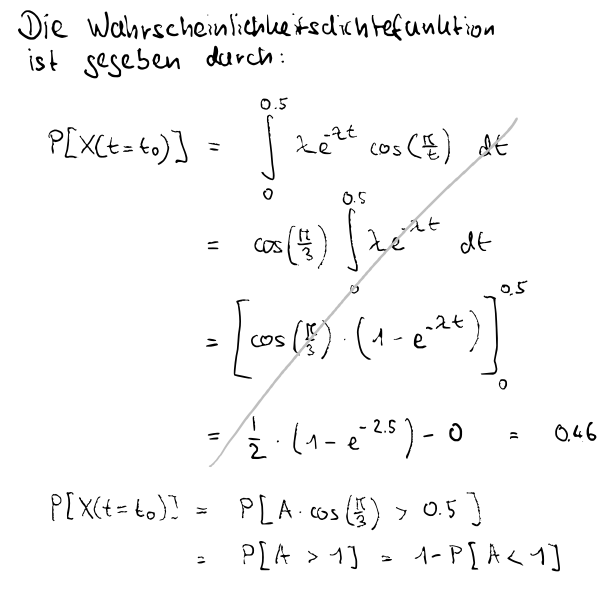

In [40]:
import scipy.stats as st

1 - st.expon.cdf(1, scale=1/5)

0.006737946999085476

---
(c) (4 Punkte) Berechnen Sie den Erwartungswert $µ_X(t) = E[X(t)]$ zu einem beliebigen
Zeitpunkt t.

$$E[X(t)] = E[A] \cdot \cos(\pi t) = \frac{\cos(\pi t)}{\lambda}$$

---
(d) (4 Punkte) Wie gross ist die Varianz $\text{Var}[X(t)]$ zu einem beliebigen Zeitpunkt $t$?

http://modulname-generator.surge.sh/austritt.pdf

---
(e) (1 Punkt) Handelt es sich bei $X(t)$ um einen stationären stochastischen Prozess?

Da der scharmittelwert von der Zeit 't' abhaengt, ist der stochastische Prozess nicht stationaer.